# Black Friday Sales Prediction
- by Ayush Mandowara

## Problem Statement

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Strategy
- Read data
- Check for general information (info, shape, describe)
- Null Value Analysis
- Exploratory Data Analytics
- Outlier Treatment
- Model Building
    - Train Test Split
    - Scaling
    - PCA (if reqd)
    - Linear Regression / Ridge / Lasso
    - Decision Trees

## Reading and Understanding the Data

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.shape

(550068, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


### Null Value Analysis

#### Product_category_2 and Product_Category_3 have missing values.

<AxesSubplot:>

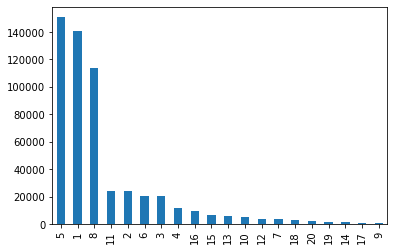

In [7]:
df['Product_Category_1'].value_counts().plot(kind='bar')

<AxesSubplot:>

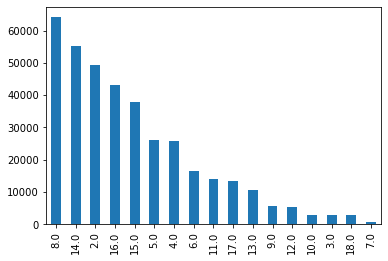

In [8]:
df['Product_Category_2'].value_counts().plot(kind='bar')

<AxesSubplot:>

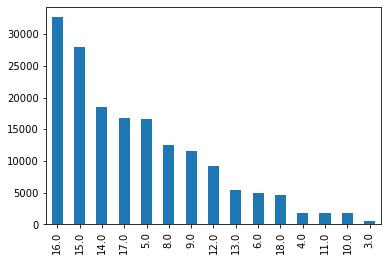

In [9]:
df['Product_Category_3'].value_counts().plot(kind='bar')

#### As per the dataset, it appears that these values are genuinely empty (because the product does not belong to additional categories), hence we can impute these values with 0
- Note that we can check whether the same product id has missing values in some rows while it is filled in others, however, in this iteration we are assuming that all rows will have missing info

In [10]:
df.loc[:, ['Product_Category_2', 'Product_Category_3']] = df.loc[:, ['Product_Category_2', 'Product_Category_3']].fillna(0)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [12]:
df[['Product_Category_2', 'Product_Category_3']] = df[['Product_Category_2', 'Product_Category_3']].astype('int')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category_1          550068 non-null  int64 
 9   Product_Category_2          550068 non-null  int32 
 10  Product_Category_3          550068 non-null  int32 
 11  Purchase                    550068 non-null  int64 
dtypes: int32(2), int64(5), object(5)
memory usage: 46.2+ MB


In [14]:
df[['Product_Category_2', 'Product_Category_3']].head()

,Product_Category_2,Product_Category_3
0,0,0
1,6,14
2,0,0
3,14,0
4,0,0


In [15]:
df[['Product_Category_1', 'Product_Category_2', 'Product_Category_3']] = df[['Product_Category_1', 'Product_Category_2', 'Product_Category_3']].astype('object')

In [16]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0,0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0,0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0,0,7969


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category_1          550068 non-null  object
 9   Product_Category_2          550068 non-null  object
 10  Product_Category_3          550068 non-null  object
 11  Purchase                    550068 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 50.4+ MB


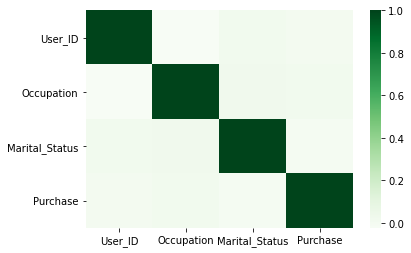

In [18]:
sns.heatmap(df.corr(), cmap='Greens')
plt.show()

### Data Preparation - Encoding

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le = LabelEncoder()

In [21]:
df['Gender'] = le.fit_transform(df['Gender'])

In [22]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,0,0,8370
1,1000001,P00248942,0,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,0,0-17,10,A,2,0,12,0,0,1422
3,1000001,P00085442,0,0-17,10,A,2,0,12,14,0,1057
4,1000002,P00285442,1,55+,16,C,4+,0,8,0,0,7969


In [23]:
df['Age'] = le.fit_transform(df['Age'])

In [24]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,A,2,0,3,0,0,8370
1,1000001,P00248942,0,0,10,A,2,0,1,6,14,15200
2,1000001,P00087842,0,0,10,A,2,0,12,0,0,1422
3,1000001,P00085442,0,0,10,A,2,0,12,14,0,1057
4,1000002,P00285442,1,6,16,C,4+,0,8,0,0,7969


In [25]:
df['City_Category'] = le.fit_transform(df['City_Category'])

In [26]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,0,0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6,14,15200
2,1000001,P00087842,0,0,10,0,2,0,12,0,0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14,0,1057
4,1000002,P00285442,1,6,16,2,4+,0,8,0,0,7969


In [27]:
df['Stay_In_Current_City_Years'].dtype

dtype('O')

In [28]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.strip('+').astype('int')

In [51]:
df['User_ID'] = le.fit_transform(df['User_ID'])

In [52]:
df['Product_ID'] = le.fit_transform(df['Product_ID'])

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  int64   
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  int32   
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  int32   
 7   Marital_Status              550068 non-null  category
 8   Product_Category_1          550068 non-null  category
 9   Product_Category_2          550068 non-null  category
 10  Product_Category_3          550068 non-null  category
 11  Purchase                    550068 non-null  int64   
dtypes: category(7), int32(2), int64(3)
memory usage: 20.5 MB


<AxesSubplot:>

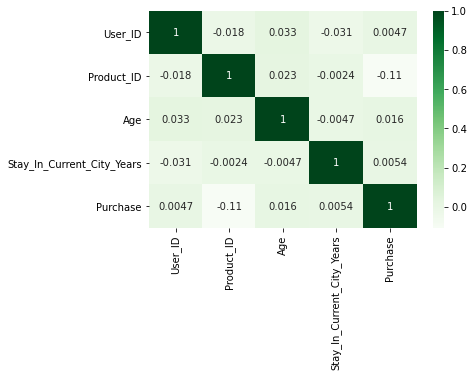

In [54]:
sns.heatmap(df.corr(), cmap='Greens', annot=True)

##### Observation
- There seems to be a correlation between Age and Marital Status

In [55]:
df[['User_ID', 'Product_ID', 'Occupation', 'City_Category', 'Gender', 
    'Marital_Status', 'Product_Category_1', 'Product_Category_2', 
    'Product_Category_3']] = df[['User_ID', 'Product_ID', 'Occupation', 'City_Category', 'Gender', 
    'Marital_Status', 'Product_Category_1', 'Product_Category_2', 
    'Product_Category_3']].astype('category')

In [56]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,672,0,0,10,0,2,0,3,0,0,8370
1,0,2376,0,0,10,0,2,0,1,6,14,15200
2,0,852,0,0,10,0,2,0,12,0,0,1422
3,0,828,0,0,10,0,2,0,12,14,0,1057
4,1,2734,1,6,16,2,4,0,8,0,0,7969


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  int32   
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  int32   
 7   Marital_Status              550068 non-null  category
 8   Product_Category_1          550068 non-null  category
 9   Product_Category_2          550068 non-null  category
 10  Product_Category_3          550068 non-null  category
 11  Purchase                    550068 non-null  int64   
dtypes: category(9), int32(2), int64(1)
memory usage: 14.5 MB


---

## EDA

In [36]:
cat_cols = df.select_dtypes('category').columns.to_list()

In [37]:
num_cols = df.select_dtypes('category').columns.to_list()

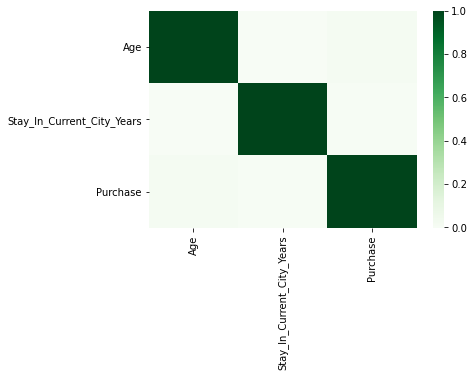

In [38]:
sns.heatmap(df.corr(), cmap='Greens')
plt.show()

In [39]:
cat_cols

['User_ID',
 'Product_ID',
 'Gender',
 'Occupation',
 'City_Category',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3']

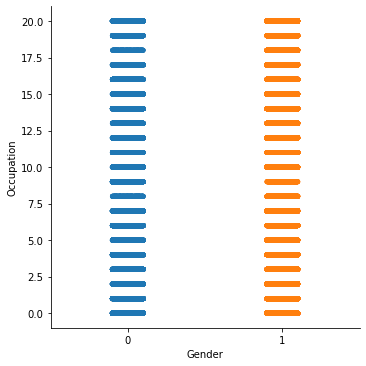

In [40]:
sns.catplot(x='Gender', y='Occupation', data=df)

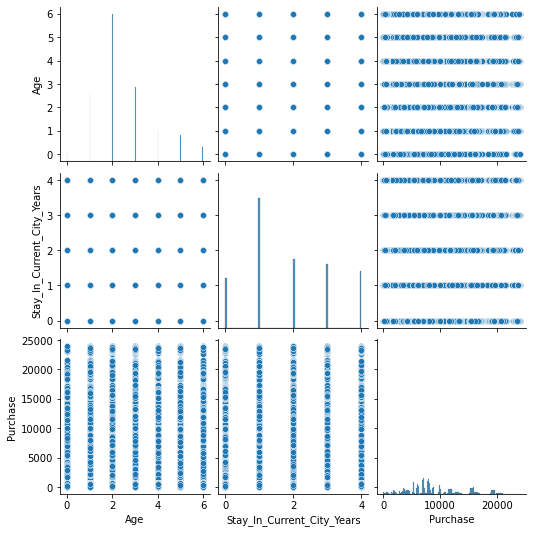

In [41]:
sns.pairplot(df)
plt.show()

---

### Train-Test Split

In [57]:
y = df['Purchase']
X = df.drop('Purchase', axis=1)

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [59]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((440054, 11), (440054,), (110014, 11), (110014,))

---

In [60]:
X_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
178247,3478,2228,1,5,7,1,3,1,1,15,0
196647,336,1305,1,1,12,2,4,0,5,0,0
418590,4273,2782,1,2,5,1,1,0,8,14,17
408727,2852,2631,1,1,4,1,2,0,8,0,0
216416,3340,485,1,1,4,1,1,0,1,8,0


In [61]:
X.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0,672,0,0,10,0,2,0,3,0,0
1,0,2376,0,0,10,0,2,0,1,6,14
2,0,852,0,0,10,0,2,0,12,0,0
3,0,828,0,0,10,0,2,0,12,14,0
4,1,2734,1,6,16,2,4,0,8,0,0


In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
lr = LinearRegression()

In [64]:
lr.fit(X_train, y_train)

LinearRegression()

In [65]:
y_train_pred = lr.predict(X_train)

In [66]:
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error

In [67]:
mean_squared_error(y_train, y_train_pred)**0.5

4615.09137610716

### Scaling

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
scaler = StandardScaler()

In [70]:
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [71]:
pd.DataFrame(X_train_scaled, columns=X_train.columns)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0.312990,0.512937,0.571611,1.850140,-0.164980,-0.055874,0.884814,1.200344,-1.118589,1.330212,-0.613898
1,-1.551973,-0.398611,0.571611,-1.105085,0.601780,1.259038,1.660380,-0.833095,-0.102579,-1.082862,-0.613898
2,0.784870,1.060064,0.571611,-0.366279,-0.471684,-0.055874,-0.666318,-0.833095,0.659429,1.169340,2.108453
3,-0.058578,0.910938,0.571611,-1.105085,-0.625036,-0.055874,0.109248,-0.833095,0.659429,-1.082862,-0.613898
4,0.231079,-1.208438,0.571611,-1.105085,-0.625036,-0.055874,-0.666318,-0.833095,-1.118589,0.204111,-0.613898
...,...,...,...,...,...,...,...,...,...,...,...
440049,1.138037,-1.294359,0.571611,1.111334,1.368540,1.259038,0.109248,-0.833095,-0.102579,-1.082862,-0.613898
440050,0.515987,-1.470150,0.571611,-0.366279,0.908484,1.259038,0.109248,1.200344,-0.102579,-1.082862,-0.613898
440051,-0.451514,1.330665,-1.749443,-1.105085,-1.085092,-0.055874,-0.666318,-0.833095,-0.102579,-1.082862,-0.613898
440052,-0.448546,-1.671620,-1.749443,-1.105085,-0.625036,-0.055874,0.109248,-0.833095,0.659429,1.169340,-0.613898


In [72]:
lr.fit(X_train, y_train)

LinearRegression()

In [73]:
y_train_pred = lr.predict(X_train)

In [74]:
mean_squared_error(y_train, y_train_pred)**0.5

4615.09137610716

In [75]:
y_test_pred = lr.predict(X_test_scaled)

In [76]:
y_test_pred

array([11660.20087813,  9936.41970638,  8447.33201583, ...,
        9586.51130173,  9768.3455444 ,  8741.77799794])

In [77]:
mean_squared_error(y_test, y_test_pred)**0.5

4924.066295878319

---

In [78]:
from sklearn.decomposition import PCA

In [79]:
pca = PCA(0.9)

In [80]:
pca.fit(X_train_scaled)

PCA(n_components=0.9)

In [81]:
X_train_scaled

array([[ 0.31299004,  0.51293741,  0.57161057, ..., -1.11858944,
         1.33021208, -0.61389777],
       [-1.55197302, -0.39861144,  0.57161057, ..., -0.10257906,
        -1.08286211, -0.61389777],
       [ 0.78486961,  1.06006423,  0.57161057, ...,  0.65942872,
         1.16934047,  2.10845314],
       ...,
       [-0.45151423,  1.33066486, -1.74944281, ..., -0.10257906,
        -1.08286211, -0.61389777],
       [-0.44854644, -1.67161952, -1.74944281, ...,  0.65942872,
         1.16934047, -0.61389777],
       [-1.25934832, -0.95758939, -1.74944281, ..., -0.10257906,
         1.16934047, -0.61389777]])

In [82]:
pca.fit_transform(X_train_scaled)

array([[ 0.01308063,  2.05368781, -0.06841234, ...,  1.64897953,
        -0.44063192,  0.23065634],
       [-0.00851772, -0.94771607, -1.98500659, ..., -1.27681265,
        -0.37735019, -0.57990827],
       [-1.10649403, -0.36339677,  0.24548459, ...,  1.53587103,
        -0.18505777,  0.8352792 ],
       ...,
       [ 0.86583374, -1.94750636,  1.04112252, ...,  0.07355778,
         0.83495438, -0.1738991 ],
       [-0.21681355, -1.48572198,  1.59634109, ..., -0.70511839,
         0.42512986, -0.30297797],
       [-0.12300774, -0.83512378,  1.60050332, ...,  0.13558236,
         0.44786157, -1.37743098]])

In [83]:
explain_var = pd.DataFrame([pca.explained_variance_ratio_])

In [84]:
# lr.fit(pca, y_train)

In [85]:
import statsmodels.api as sm

In [86]:
from sklearn.tree import DecisionTreeRegressor

In [87]:
dt = DecisionTreeRegressor(max_depth=5)

In [88]:
dt.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=5)

In [89]:
y_test_pred = dt.predict(X_test_scaled)

In [90]:
mean_squared_error(y_test, y_test_pred)**0.5

3223.509550495407

---

In [91]:
from sklearn.ensemble import RandomForestRegressor

In [92]:
rf = RandomForestRegressor(max_depth=5)

In [93]:
rf.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=5)

In [94]:
y_test_pred = rf.predict(X_test_scaled)

In [95]:
mean_squared_error(y_test, y_test_pred)**0.5

3225.72967034761

---

In [191]:
actual_test = pd.read_csv("test.csv")

In [192]:
actual_test

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


In [193]:
actual_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [194]:
actual_test.loc[:, ['Product_Category_2', 'Product_Category_3']] = df.loc[:, ['Product_Category_2', 'Product_Category_3']].fillna(0)

In [195]:
actual_test[['Product_Category_2', 'Product_Category_3']] = df[['Product_Category_2', 'Product_Category_3']].astype('int')

In [196]:
actual_test[['Product_Category_1', 'Product_Category_2', 'Product_Category_3']] = df[['Product_Category_1', 'Product_Category_2', 'Product_Category_3']].astype('object')

In [197]:
actual_test['Gender'] = le.fit_transform(actual_test['Gender'])

In [198]:
actual_test['City_Category'] = le.fit_transform(actual_test['City_Category'])

In [199]:
actual_test['Stay_In_Current_City_Years'] = actual_test['Stay_In_Current_City_Years'].str.strip('+').astype('int')

In [202]:
user_id_orig = np.array(actual_test['User_ID'])

In [203]:
user_id_orig

array([1000004, 1000009, 1000010, ..., 1006036, 1006037, 1006039],
      dtype=int64)

In [204]:
actual_test['User_ID'] = le.fit_transform(actual_test['User_ID'])

In [205]:
product_id_orig = actual_test['Product_ID']
actual_test['Product_ID'] = le.fit_transform(actual_test['Product_ID'])

In [206]:
actual_test['Age'] = le.fit_transform(actual_test['Age'])

In [207]:
actual_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,3,1144,1,4,7,1,2,1,3,0,0
1,8,994,1,2,17,2,0,0,1,6,14
2,9,2672,0,3,1,1,4,1,12,0,0
3,9,1299,0,3,1,1,4,1,12,14,0
4,10,519,0,2,1,2,1,0,8,0,0


In [208]:
actual_test_scaled = scaler.transform(actual_test)

In [216]:
y_test_actual_pred = rf.predict(actual_test_scaled)

submission = pd.DataFrame(np.array([y_test_actual_pred, user_id_orig, product_id_orig]).T, columns=['Purchase', 'User_ID', 'Product_ID'])

submission.to_csv('submission.csv', index=False)

submission.head()

,Purchase,User_ID,Product_ID
0,10203.436202,1000004,P00128942
1,15096.238508,1000009,P00113442
2,4364.77843,1000010,P00288442
3,4364.77843,1000010,P00145342
4,7846.550226,1000011,P00053842


In [217]:
y_test_actual_pred = dt.predict(actual_test_scaled)

submission = pd.DataFrame(np.array([y_test_actual_pred, user_id_orig, product_id_orig]).T, columns=['Purchase', 'User_ID', 'Product_ID'])

submission.to_csv('submission.csv', index=False)

submission.head()

,Purchase,User_ID,Product_ID
0,10234.101059,1000004,P00128942
1,15013.137744,1000009,P00113442
2,3639.795396,1000010,P00288442
3,3639.795396,1000010,P00145342
4,8049.877689,1000011,P00053842


In [218]:
y_test_actual_pred = lr.predict(actual_test_scaled)

submission = pd.DataFrame(np.array([y_test_actual_pred, user_id_orig, product_id_orig]).T, columns=['Purchase', 'User_ID', 'Product_ID'])

submission.to_csv('submission.csv', index=False)

submission.head()

,Purchase,User_ID,Product_ID
0,10515.239971,1000004,P00128942
1,11360.348033,1000009,P00113442
2,8504.519912,1000010,P00288442
3,8524.900491,1000010,P00145342
4,9276.026789,1000011,P00053842


In [219]:
from sklearn.linear_model import Ridge, Lasso

In [237]:
ridge = Ridge(alpha=0.3)

ridge.fit(X_train_scaled, y_train)

y_test_pred =  ridge.predict(X_test_scaled)

mean_squared_error(y_test, y_test_pred)**0.5

4606.3737905328335

In [228]:
lasso = Lasso(alpha=0.1)

lasso.fit(X_train_scaled, y_train)

y_test_pred =  lasso.predict(X_test_scaled)

mean_squared_error(y_test, y_test_pred)**0.5

4606.374395377113

In [238]:
y_test_pred =  lr.predict(X_test_scaled)
mean_squared_error(y_test, y_test_pred)**0.5

4924.066295878319

In [239]:
y_test_actual_pred = lasso.predict(actual_test_scaled)

submission = pd.DataFrame(np.array([y_test_actual_pred, user_id_orig, product_id_orig]).T, columns=['Purchase', 'User_ID', 'Product_ID'])

submission.to_csv('submission.csv', index=False)

submission.head()

,Purchase,User_ID,Product_ID
0,9912.63558,1000004,P00128942
1,12821.428909,1000009,P00113442
2,5673.884385,1000010,P00288442
3,6245.759129,1000010,P00145342
4,7997.442039,1000011,P00053842


In [240]:
from sklearn.model_selection import GridSearchCV

In [244]:
params = {'alpha': np.arange(0.1, 1, 0.1)}

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring = 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True)

alpha_lasso = model_cv.fit(X_train_scaled, y_train).best_params_
print(alpha_lasso)

{'alpha': 0.1}


In [245]:
X.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0,672,0,0,10,0,2,0,3,0,0
1,0,2376,0,0,10,0,2,0,1,6,14
2,0,852,0,0,10,0,2,0,12,0,0
3,0,828,0,0,10,0,2,0,12,14,0
4,1,2734,1,6,16,2,4,0,8,0,0


<AxesSubplot:>

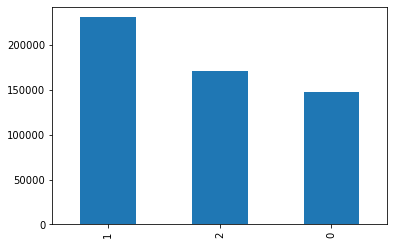

In [248]:
df['City_Category'].value_counts().plot(kind='bar')

<AxesSubplot:>

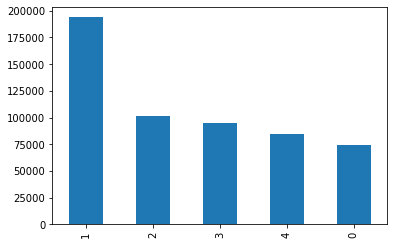

In [249]:
df['Stay_In_Current_City_Years'].value_counts().plot(kind='bar')

<AxesSubplot:>

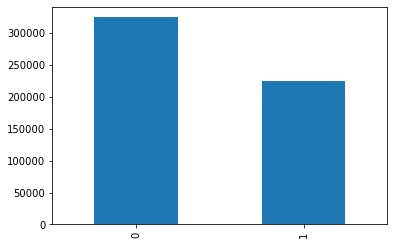

In [250]:
df['Marital_Status'].value_counts().plot(kind='bar')

<AxesSubplot:>

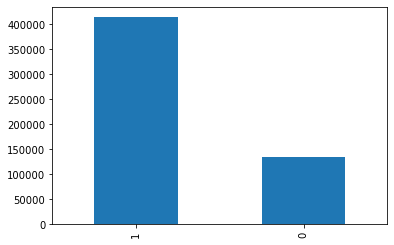

In [251]:
df['Gender'].value_counts().plot(kind='bar')

<AxesSubplot:>

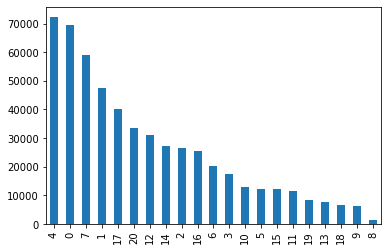

In [252]:
df['Occupation'].value_counts().plot(kind='bar')